# Subsampling to epithelial cells

In this notebook the scPoli integrated data is subsampled to only epithelial cells since pseudotime analysis performed poorly when considering all cells at once, most likely because different lineages have different root cells, and DPT only allows for one root cell.

## Import packages

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scvelo as scv
import matplotlib.pyplot as plt

## Load and inspect the data

In [2]:
Path='/home/mgander/pancreas_multiome/data2'

adata=sc.read_h5ad(f'{Path}/hioca_integration.h5ad')
adata

AnnData object with n_obs × n_vars = 353140 × 23147
    obs: 'sample_id', 'publication', 'sample_name', 'tissue', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'batch', 'derive', 'detail_tissue', 'time', 'protocol', 'tech_detail', 'molecular', 'gel', 'leiden', 'leiden_10.0', 'level_1', 'level_2', 'level_3', 'level_1_original', 'level_2_original', 'level_3_original', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type'
    var: 'gene_name'
    obsm: 'X_scPoli', 'X_umap', 'X_umap_min', 'X_umap_sc'

In [3]:
adata.var['ENSG']=adata.var.index
adata.var.index=adata.var['gene_name']

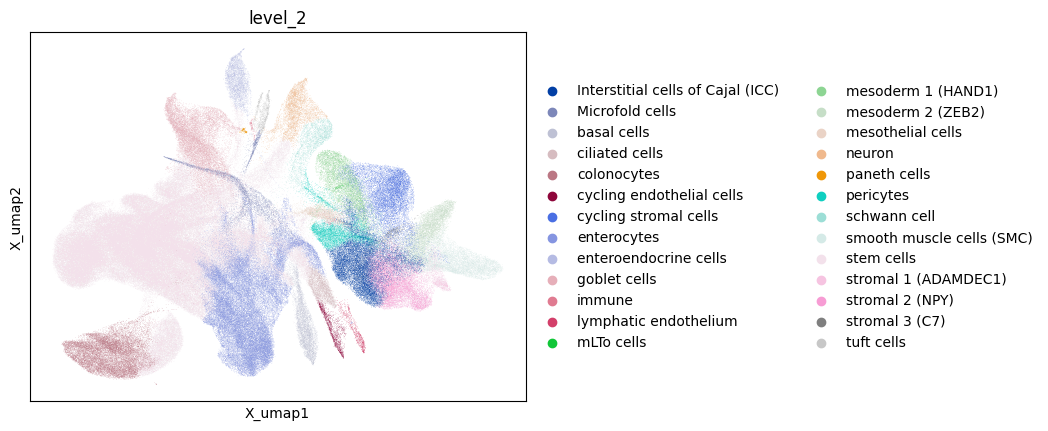

In [5]:
sc.pl.embedding(adata, basis='X_umap', color='level_2')

In [6]:
plt.rcParams['figure.dpi'] = 300

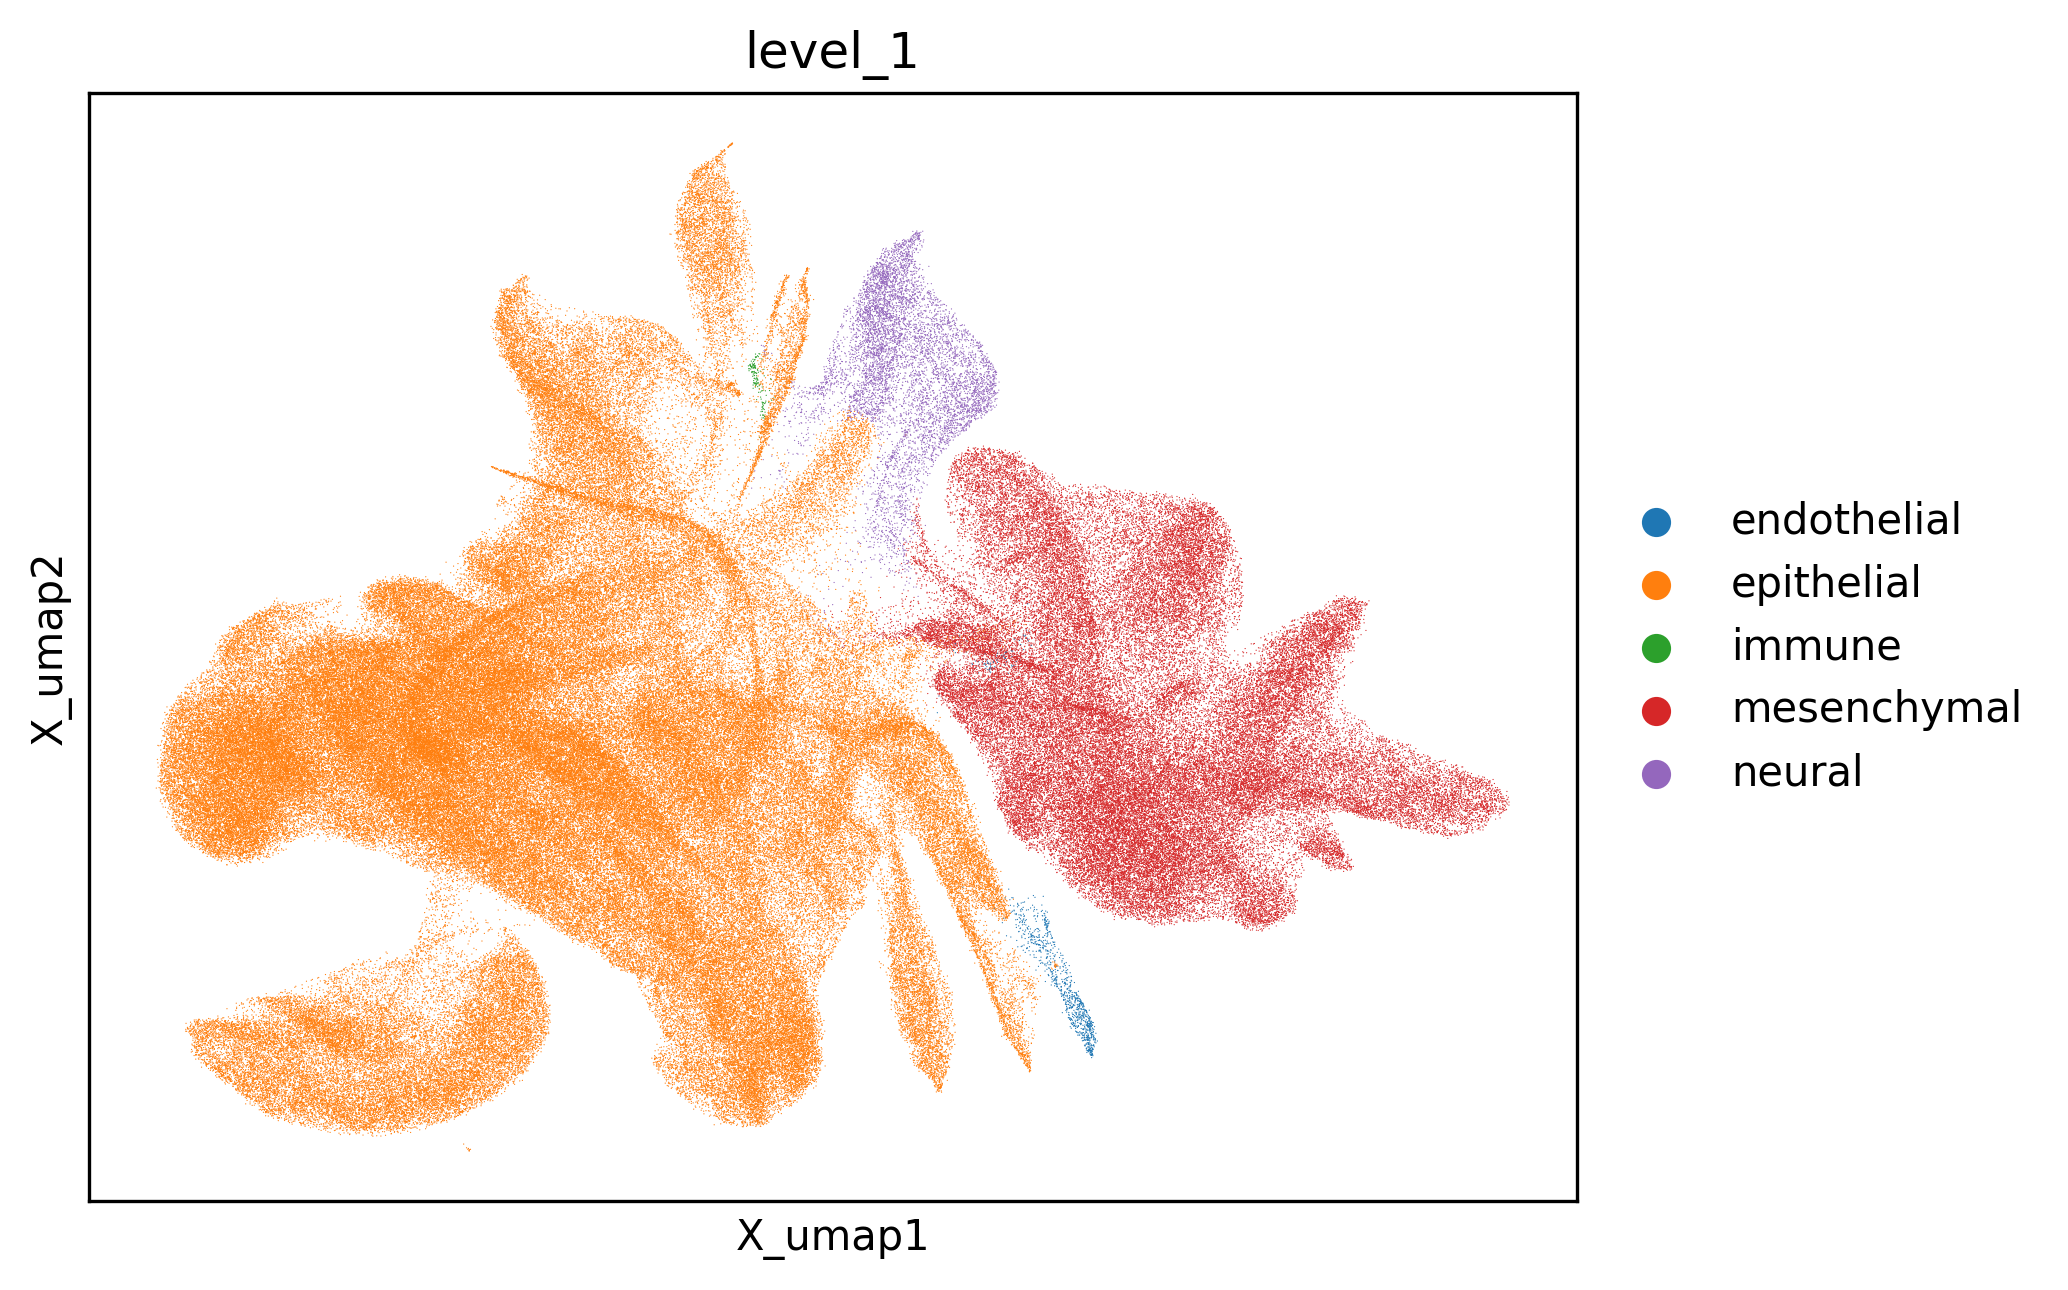

In [7]:
sc.pl.embedding(adata, basis='X_umap', color='level_1')

In [4]:
adata.obs['day']=[float(str(a).split('day')[0]) if str(a) not in ['early', 'late', 'NA', 'NaN'] else np.NaN for a in adata.obs['time'] ]

# Subsample to epithelial cells

In [5]:
adata.obs['level_1'].cat.categories

Index(['endothelial', 'epithelial', 'immune', 'mesenchymal', 'neural'], dtype='object')

In [6]:
adata.obs['level_1']=adata.obs['level_1'].astype('category')
adata=adata[adata.obs['level_1']=='epithelial'].copy()
adata

AnnData object with n_obs × n_vars = 267256 × 23147
    obs: 'sample_id', 'publication', 'sample_name', 'tissue', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'batch', 'derive', 'detail_tissue', 'time', 'protocol', 'tech_detail', 'molecular', 'gel', 'leiden', 'leiden_10.0', 'level_1', 'level_2', 'level_3', 'level_1_original', 'level_2_original', 'level_3_original', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'day'
    var: 'gene_name', 'ENSG'
    obsm: 'X_scPoli', 'X_umap', 'X_umap_min', 'X_umap_sc'

## Recompute neighborhood/connectivity graph

In [7]:
adata.obsm['X_umap_initial']=adata.obsm['X_umap'].copy()
sc.pp.neighbors(adata, use_rep='X_scPoli')
sc.tl.umap(adata)

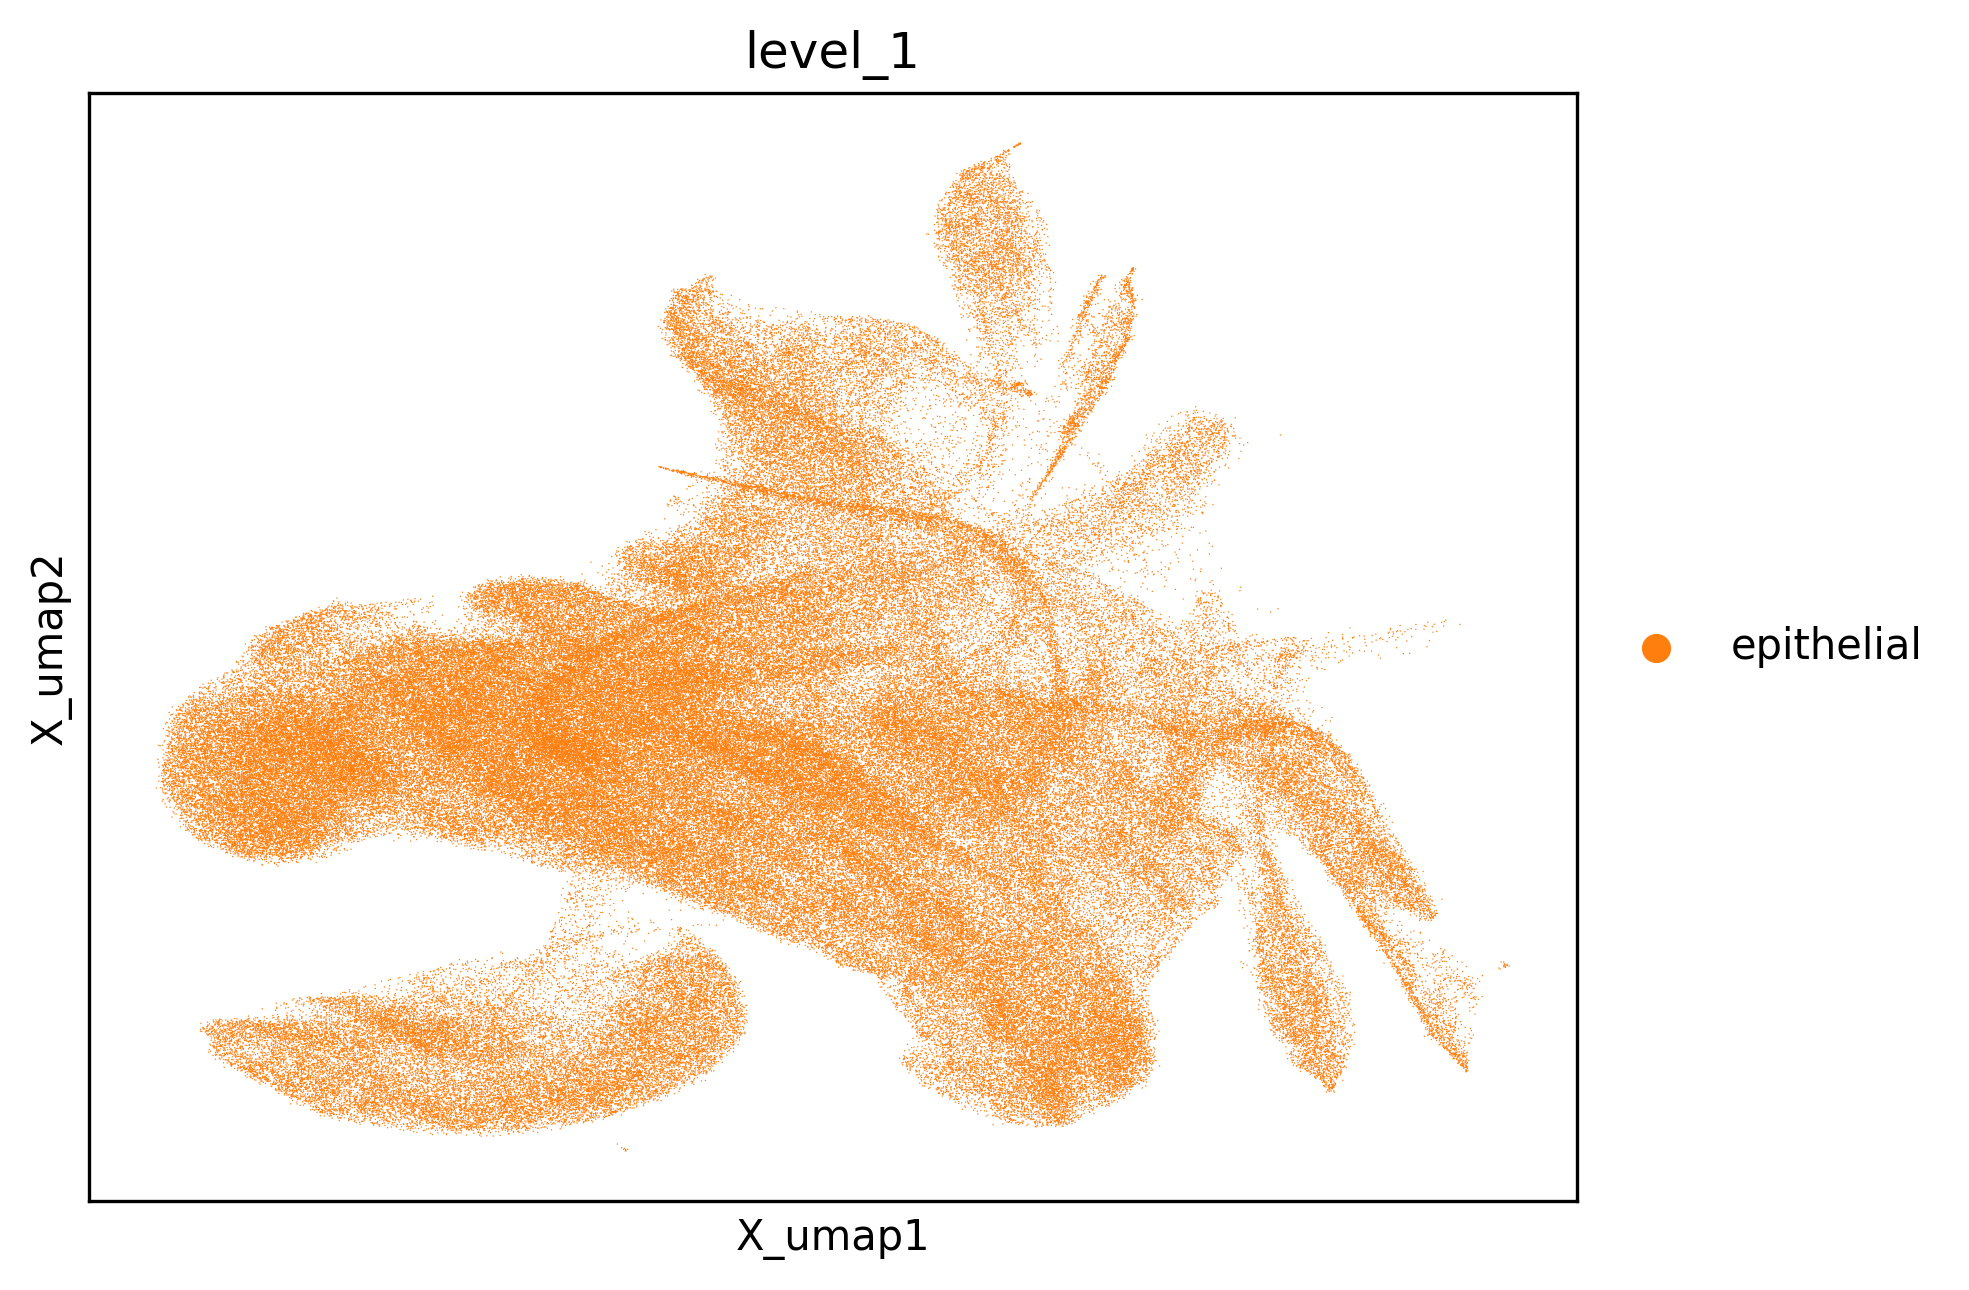

In [12]:
sc.pl.embedding(adata, basis='X_umap_initial', color='level_1')

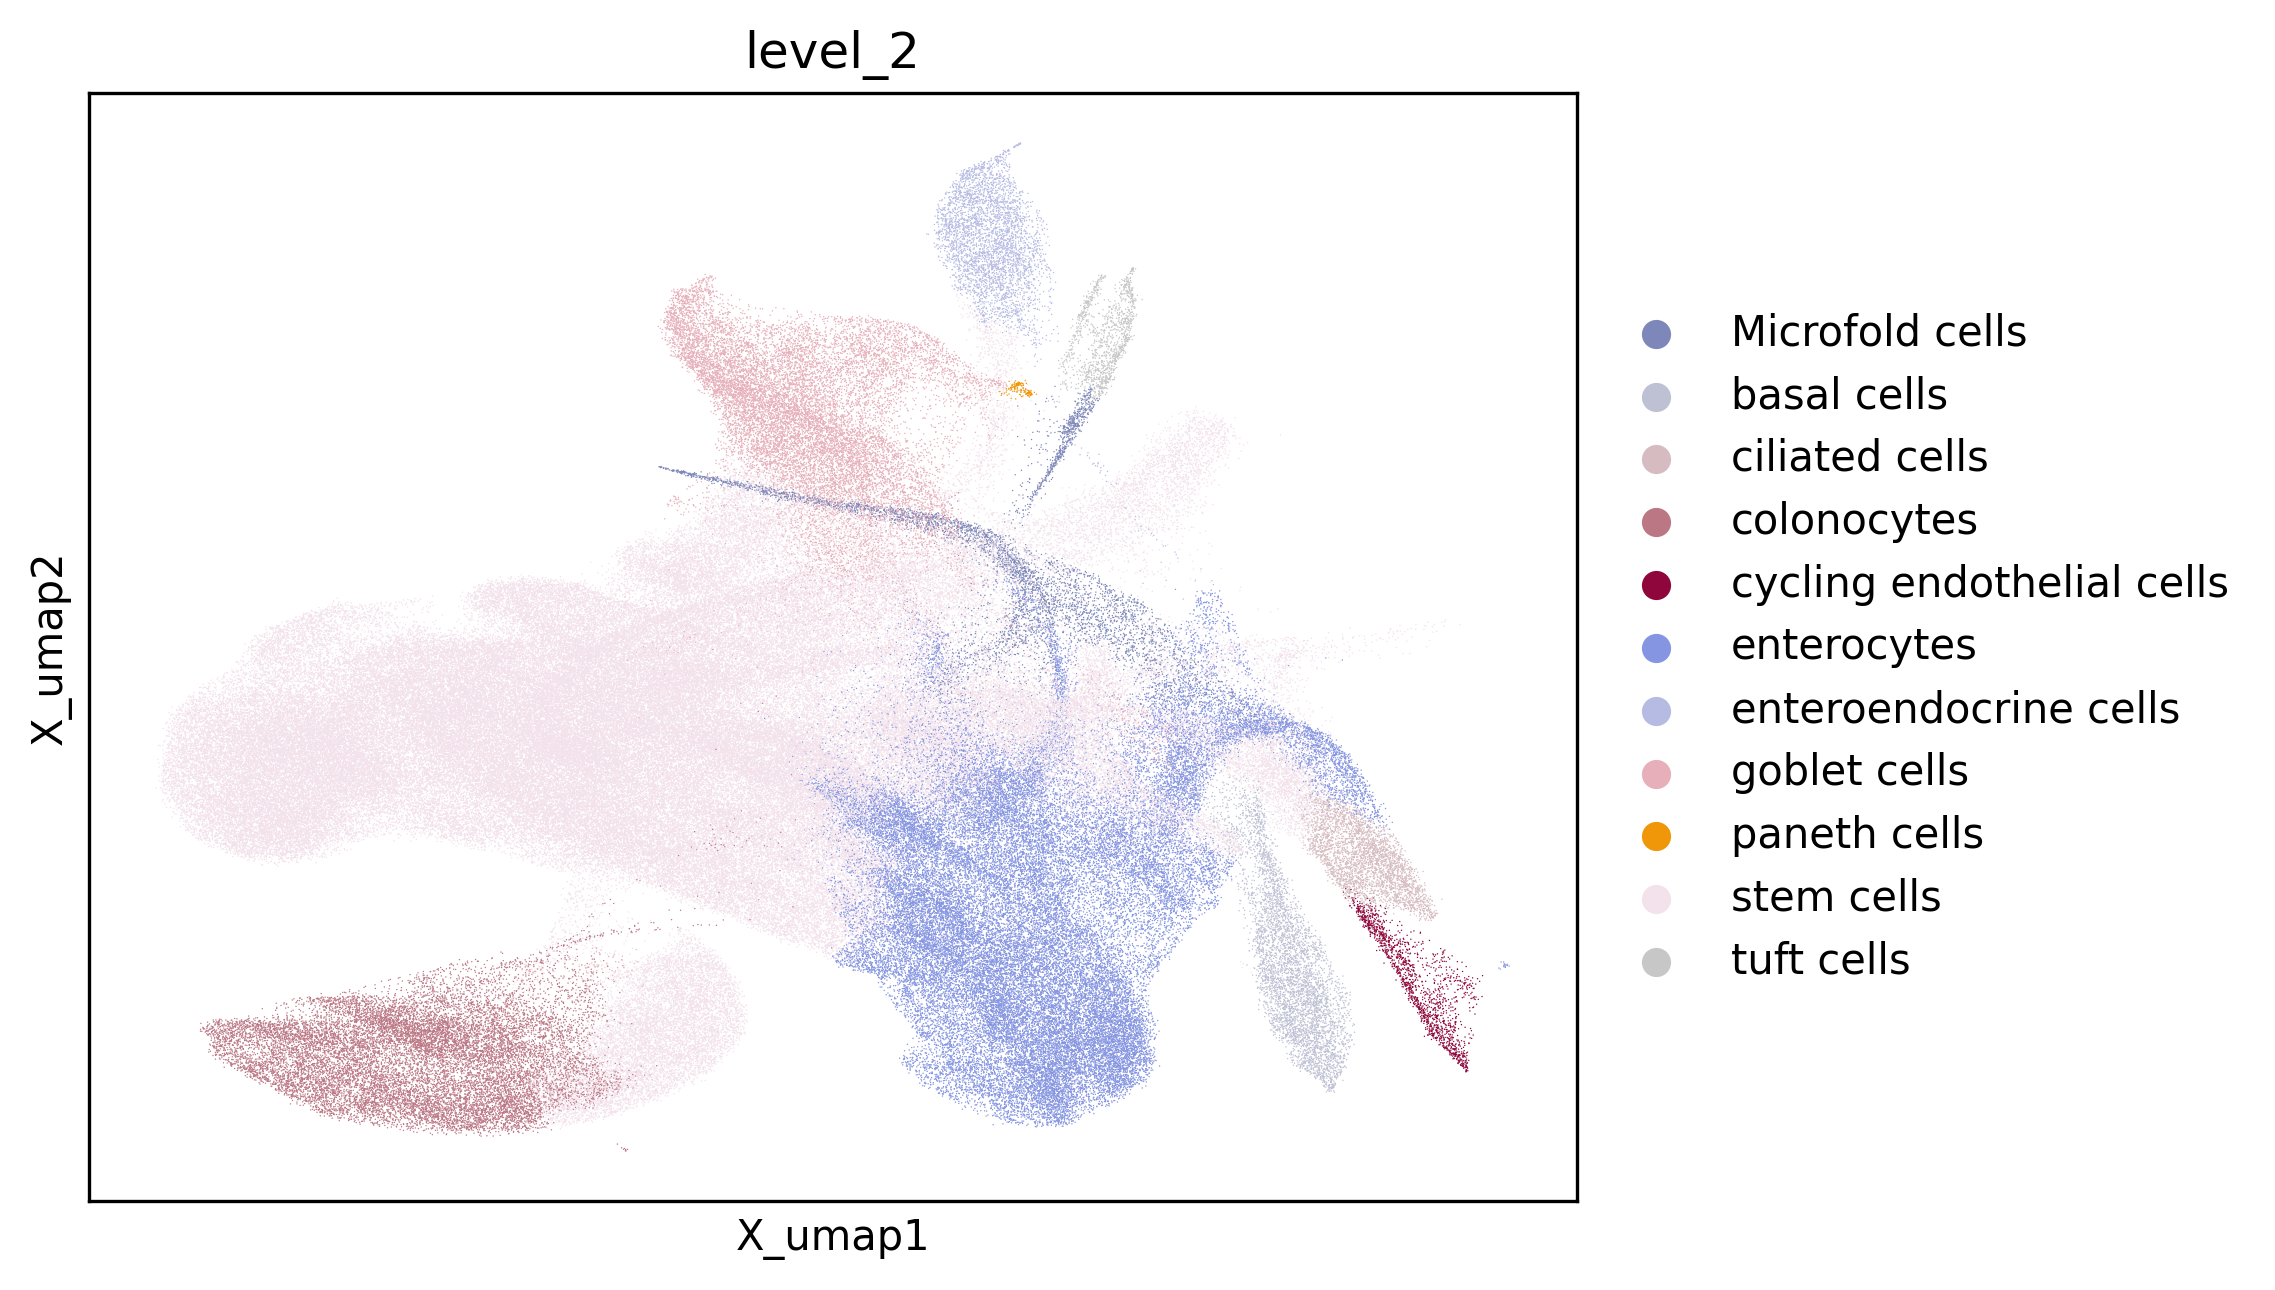

In [14]:
sc.pl.embedding(adata, basis='X_umap_initial', color='level_2')

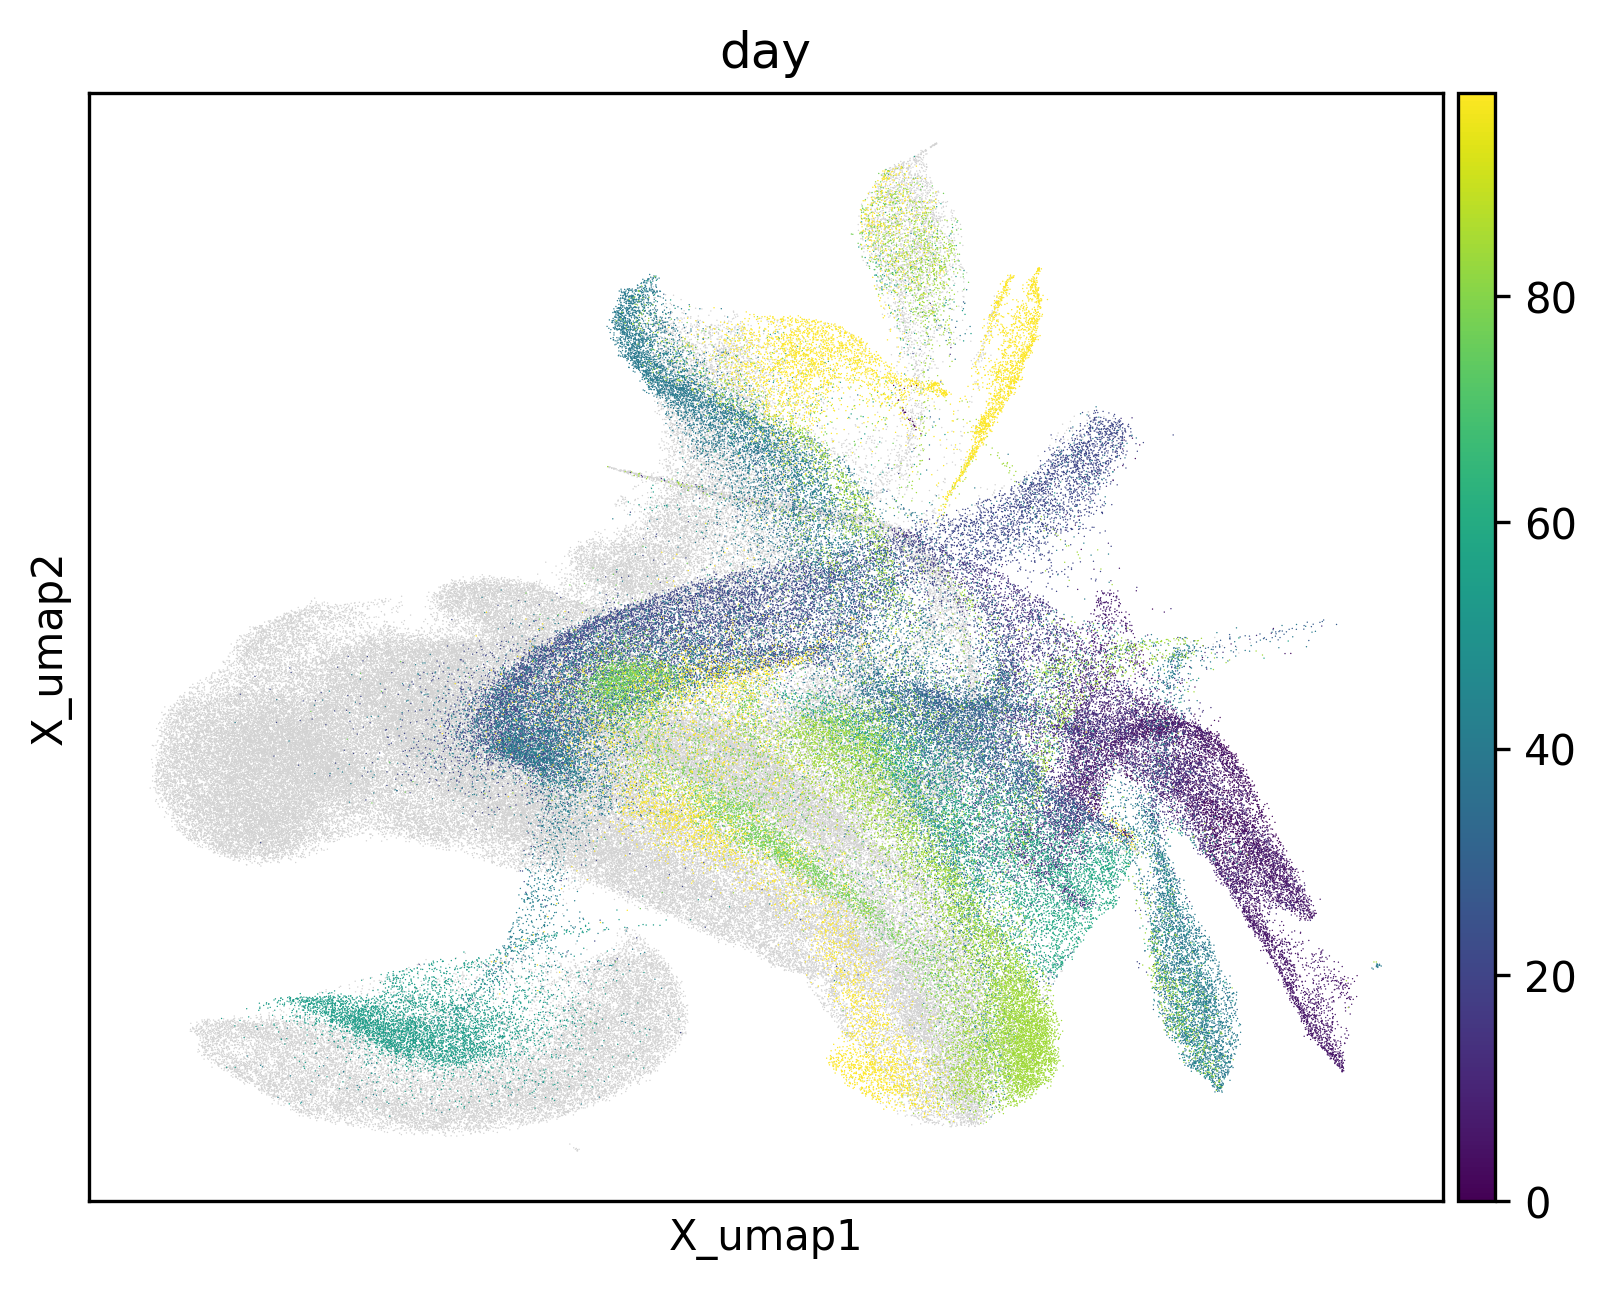

In [15]:
sc.pl.embedding(adata, basis='X_umap_initial', color='day')

In [8]:
del adata.raw

In [9]:
adata.write(f'{Path}/Intestinal_epithelial_adata.h5ad')

# Select genes + define hvgs

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scvelo as scv
import matplotlib.pyplot as plt

In [2]:
Path='/home/mgander/pancreas_multiome/data2'
adata=sc.read_h5ad(f'{Path}/Intestinal_epithelial_adata.h5ad')
adata

AnnData object with n_obs × n_vars = 267256 × 23147
    obs: 'sample_id', 'publication', 'sample_name', 'tissue', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'batch', 'derive', 'detail_tissue', 'time', 'protocol', 'tech_detail', 'molecular', 'gel', 'leiden', 'leiden_10.0', 'level_1', 'level_2', 'level_3', 'level_1_original', 'level_2_original', 'level_3_original', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'day'
    var: 'gene_name', 'ENSG'
    uns: 'level_1_colors', 'level_2_colors', 'neighbors', 'umap'
    obsm: 'X_scPoli', 'X_umap', 'X_umap_initial', 'X_umap_min', 'X_umap_sc'
    obsp: 'connectivities', 'distances'

In [3]:
# filter genes
sc.pp.filter_genes(adata, min_cells=10)

In [4]:
# hvg annotation
sc.pp.highly_variable_genes(adata)
print(f"This detected {adata.var['highly_variable'].sum()} highly variable genes. ")

This detected 2829 highly variable genes. 


In [5]:
adata.write(f'{Path}/Intestinal_epithelial_adata.h5ad')